In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import math
%matplotlib inline
%autosave 180

Autosaving every 180 seconds


In [2]:
deaths_df = pd.read_csv("us_gun_deaths.csv", )

### Let's explore the dataset.

In [3]:
deaths_df.head()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED


Delete the serial numbering column this is labled "Unnamed: 0" which is actually unlabled in the csv.

In [4]:
deaths_df = deaths_df.drop(deaths_df.columns[0],axis=1)

In [5]:
deaths_df.head()

,year,month,intent,police,sex,age,race,hispanic,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
1,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
2,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
3,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
4,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED


# Data Cleaning

Let's first see if there are any of rows contain missing values.

In [6]:
deaths_df.isnull().sum(axis=0)

year            0
month           0
intent          1
police          0
sex             0
age            18
race            0
hispanic        0
place        1384
education    1422
dtype: int64

1. 18 rows do not have age information. 
2. Significant number of rows do not have place or education information available.
3. Although one row doesn't have intent specified.

We can not simply drop/remove these rows. One way take care of this is to do data imputation. It's the process where we can replace the missing values by substitute values. 

### Data imputation

Let's first see the age information of the victims.

In [7]:
deaths_df['age'].describe()

count    100780.000000
mean         43.857601
std          19.496181
min           0.000000
25%          27.000000
50%          42.000000
75%          58.000000
max         107.000000
Name: age, dtype: float64

One way we can replace the null values of age is by using the mean age of the dataset (~ 44 years).   <br>            __Please note__ that this wouldn't have been an appropriate way to do the imputation when a large number of rows would have had no age information. Because replacing those missing ages with the mean age would skew the dataset and would adversely affect the exploratory findings.

In [8]:
deaths_df['age'].fillna(math.ceil(deaths_df['age'].mean()), inplace = True)

Next is "place" column for which 1384 rows do not have no data. We can replace those cells by a "Unknown"

In [9]:
deaths_df["place"].fillna("Unknown", inplace = True)

We will do the same with "education" and "intent" column's missing data.

In [10]:
deaths_df["education"].fillna("Unknown", inplace = True)

In [11]:
deaths_df["intent"].fillna("Unknown", inplace = True)

Let's verify if all the null values are filled.

In [12]:
deaths_df.isnull().sum(axis=0)

year         0
month        0
intent       0
police       0
sex          0
age          0
race         0
hispanic     0
place        0
education    0
dtype: int64

# Data Exploration

Now we can extract some meaninful information/insigts from this data. It's always good to ask questions to get the relevant insights.

### 1) Which intent/reason caused the maximum number of gun deaths?

In [13]:
def plot_piedata(column,chart_title, chart_size=(7,7)):
    deaths_df[column].value_counts().plot.pie(title = chart_title,figsize = chart_size,autopct='%1.f%%', fontsize=15)

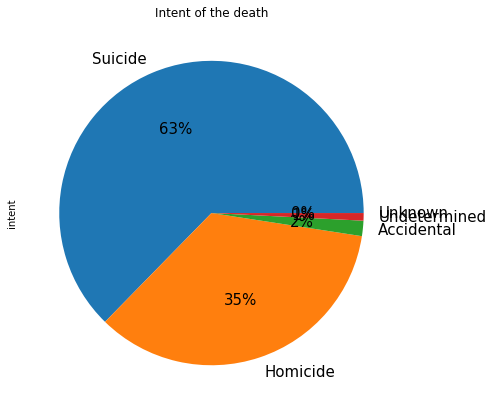

In [14]:
plot_piedata("intent","Intent of the death")

### Answer
1. Almost two-thirds of  of gun deaths were suicides. <br>
2. And the remaining one-third deaths are homicides.

In [15]:
deaths_df["intent"].value_counts()

Suicide         63175
Homicide        35176
Accidental       1639
Undetermined      807
Unknown             1
Name: intent, dtype: int64

### 2) Did any particular education group suffer the most deaths?

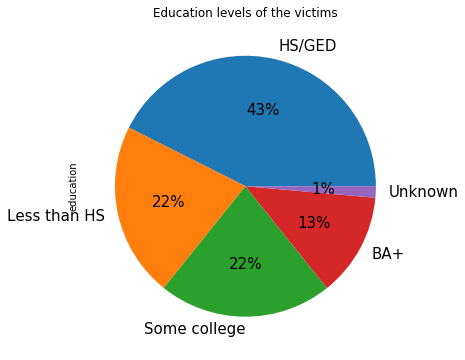

In [76]:
plot_piedata("education","Education levels of the victims",chart_size=(6,6))

### Answer
a) Almost half of the victims had completed high school diploma or equivalent. <br>
b) Two-thirds of victims had education level of high school diploma or less.


### 3) Which age group suffered the most gun deaths?

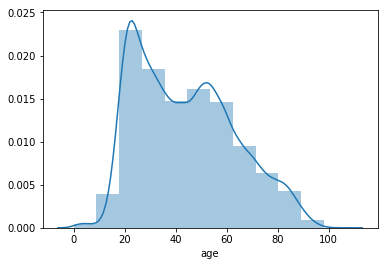

In [17]:
sns.distplot(deaths_df["age"].astype(int), label="Distribution of the age", bins=12)

In [18]:
age_groups = pd.DataFrame(pd.cut(deaths_df["age"],10,precision=0).value_counts())
type(age_groups)

pandas.core.frame.DataFrame

In [19]:
age_groups["proportion"] = round(age_groups.iloc[:,0] / age_groups.iloc[:,0].sum() * 100, 2)
age_groups.columns = ["Total count", "Percentage"]
age_groups.index.name = "Age range"
age_groups

,Total count,Percentage
Age range,,
"(21.0, 32.0]",23619,23.43
"(43.0, 54.0]",17477,17.34
"(32.0, 43.0]",15313,15.19
"(54.0, 64.0]",15250,15.13
"(11.0, 21.0]",11922,11.83
"(64.0, 75.0]",8467,8.40
"(75.0, 86.0]",6115,6.07
"(86.0, 96.0]",2078,2.06
"(-0.0, 11.0]",509,0.50


### Answer
Almost 25% of the victims were of the age group 21-32 years.

### 4) At which place most of the deaths occured?

In [20]:
place_count = pd.DataFrame(deaths_df[ "place"].value_counts())
place_count["proportion"] = round(place_count.iloc[:,0] / place_count.iloc[:,0].sum() * 100, 2)
place_count.columns = ["Death count", "Percentage"]
place_count

,Death count,Percentage
Home,60486,60.01
Other specified,13751,13.64
Street,11151,11.06
Other unspecified,8867,8.80
Trade/service area,3439,3.41
Unknown,1384,1.37
School/instiution,671,0.67
Farm,470,0.47
Industrial/construction,248,0.25
Residential institution,203,0.20


### Answer

60% of the deaths took place at home. 

If you note carefully, a high percentage of total deaths occured at home, and a high proportion of intent was suicide. We should quickly check if there is any correlation between suicides that took place at home.

### 5) Did suicide take place the most at any particular location?

In [21]:
suicide_locations = pd.DataFrame(deaths_df.loc[deaths_df["intent"] == "Suicide", "place"].value_counts())
suicide_locations["Total deaths"] = deaths_df["place"].value_counts()
suicide_locations.columns = suicide_locations.columns.str.replace('place','Suicides')
suicide_locations["Suicide proportion"] = round(suicide_locations.iloc[:,0] / suicide_locations.iloc[:,0].sum() * 100, 2)
suicide_locations

,Suicides,Total deaths,Suicide proportion
Home,45415,60486,71.89
Other specified,8031,13751,12.71
Other unspecified,4774,8867,7.56
Street,2181,11151,3.45
Trade/service area,1723,3439,2.73
Farm,378,470,0.60
School/instiution,295,671,0.47
Industrial/construction,155,248,0.25
Residential institution,125,203,0.20
Sports,98,128,0.16


### Answer
More than 70% of the suicides took place at home.

### 6) Do suicide (by gun) victims belong to a particular education group?

In [22]:
suicide_education = pd.DataFrame(deaths_df.loc[deaths_df["intent"] == "Suicide", "education"].value_counts())
suicide_education["Total deaths"] = deaths_df["education"].value_counts()
suicide_education.columns = suicide_education.columns.str.replace('education','Suicides')
suicide_education["Suicide proportion"] = round(suicide_education.iloc[:,0] / suicide_education.iloc[:,0].sum() * 100, 2)
suicide_education

,Suicides,Total deaths,Suicide proportion
HS/GED,26321,42927,41.66
Some college,15533,21680,24.59
BA+,11147,12946,17.64
Less than HS,9292,21823,14.71
Unknown,882,1422,1.40


### Answer
More than 40% of the victims who commited suicide had completed only high school diploma or equivalent.

### 7) Do suicide (by gun) victims belong to a particular age group?

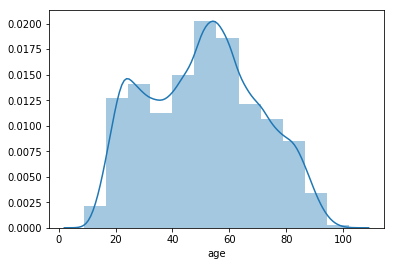

In [23]:
sns.distplot(deaths_df.loc[(deaths_df["sex"] == "M") 
                        & (deaths_df["intent"] == "Suicide")
                        ,"age"].astype(int), 
             label="Distribution of the age", bins=12)

### Answer

The highest number of suicides were from the age group 40 to 60.

### 8) Which race has suffered the most gun deaths?

In [24]:
race_deaths = pd.DataFrame(deaths_df["race"].value_counts())
race_deaths.columns= ["Death count"]
race_deaths.index.name = "Race"
race_deaths

,Death count
Race,
White,66237
Black,23296
Hispanic,9022
Asian/Pacific Islander,1326
Native American/Native Alaskan,917


Let's visualize this data

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc474139e8>], dtype=object)

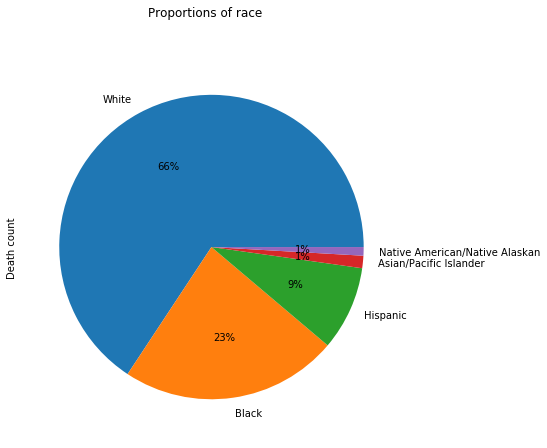

In [78]:
race_deaths.plot.pie(title = "Proportions of race",figsize=(7, 7),autopct='%1.f%%',subplots=True,legend=False)

### Answer

Two-thirds of the gun death victims belong to White race group. And one-fourth belong to Black race group.

# Here's the catch

However, this analysis gives us total gun deaths by race in US. To get better insights of the deaths for the race groups, we should anlyse them further using the population of each race. 

By knowing that we can then calculate gun deaths per 100,000 people of each race. That would gives more meaningful answers.

To get onto this, we can use the 2010 census data of the US. Here is the race-wise population distribution data. (Source: Dataquest.in)

In [26]:
census = pd.read_csv("census2010.csv",delimiter="\t")
census

,Id,Year,Id.1,Sex,Id.2,Hispanic Origin,Id.3,Id2,Geography,Total,Race Alone - White,Race Alone - Hispanic,Race Alone - Black or African American,Race Alone - American Indian and Alaska Native,Race Alone - Asian,Race Alone - Native Hawaiian and Other Pacific Islander,Two or More Races
0,cen42010,"April 1, 2010 Census",totsex,Both Sexes,tothisp,Total,0100000US,NaN,United States,308745538,197318956,44618105,40250635,3739506,15159516,674625,6984195


Let's quickly calculate the totals for each individual race group to match with the gun deaths dataset.

In [27]:
race_data_totals = {
    "Asian/Pacific Islander": int(census.iat[0,14]) + int(census.iat[0,15]),
     "Black" : int(census.iat[0,12]) ,
    "Hispanic" : int(census.iat[0,11]),
    "Native American/Native Alaskan" : int(census.iat[0,12]) ,
    "White": int(census.iat[0,10])
   
}

In [28]:
race_population = pd.DataFrame.from_dict(race_data_totals,orient="index")
race_population.columns = ['Total race population']
race_population.index.name = "Race"
race_population

,Total race population
Race,
Hispanic,44618105
Asian/Pacific Islander,15834141
White,197318956
Black,40250635
Native American/Native Alaskan,40250635


### 9) Which race suffered the most gun deaths per 100,000 population of their race group?

Let's now calculate how many gun deaths occured per 100,000 across the race.

In [29]:
race_deaths_per_100K = race_deaths.join(race_population)  
race_deaths_per_100K["Deaths per 100,000"] = round(race_deaths_per_100K.iloc[:,0] *100000 / race_deaths_per_100K.iloc[:,1],0)
race_deaths_per_100K

,Death count,Total race population,"Deaths per 100,000"
Race,,,
White,66237,197318956,34.0
Black,23296,40250635,58.0
Hispanic,9022,44618105,20.0
Asian/Pacific Islander,1326,15834141,8.0
Native American/Native Alaskan,917,40250635,2.0


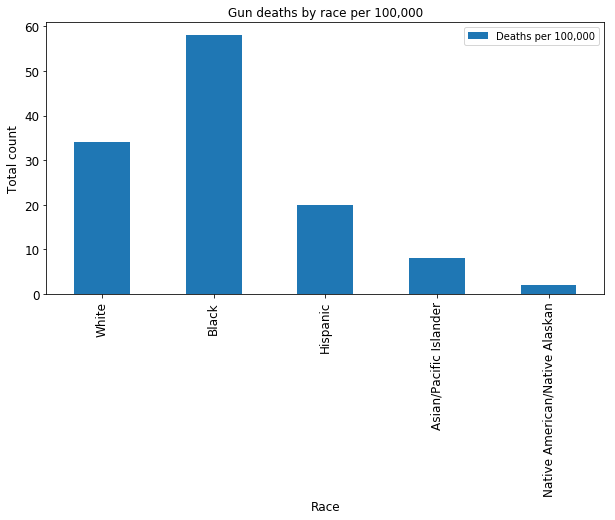

In [30]:
ax = race_deaths_per_100K[['Deaths per 100,000']].plot(kind='bar', title ="Gun deaths by race per 100,000", figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel("Race", fontsize=12)
ax.set_ylabel("Total count", fontsize=12)
plt.show()

# Answer
The Black race suffers the most gun deaths per 100,000 people i.e. 58 deaths per 100,000.

### 10) Which race suffered the most number of suicides per 100,000 population of that race group?

In [31]:
def deaths_per_intent_per_race(death_intent):
    intent_count_df = pd.DataFrame(deaths_df.loc[deaths_df["intent"] == death_intent, "race"].value_counts())
    intent_count_df.index.name = "Race"
    intent_count_df.columns = ["Total suicides"]
    return intent_count_df

In [32]:
def deaths_per_race_per_intent_per_100k(death_intent, intent_deaths_per_race):
    per_100K = intent_deaths_per_race.join(race_population)
    per_100K[death_intent + "s per 100,000"] = round(per_100K.iloc[:,0] *100000 / per_100K.iloc[:,1],0)
    return per_100K

In [33]:
def plot_deaths_intent_race_100K(death_intent,death_df):
    intent_str = death_intent + 's'
    ax = death_df[[intent_str + ' per 100,000']].plot(kind='bar', title = intent_str +  " by race per 100,000", figsize=(10, 5), legend=True, fontsize=12)
    ax.set_xlabel("Race", fontsize=12)
    ax.set_ylabel("Total count", fontsize=12)
    plt.show()

In [34]:
suicides_per_race = deaths_per_intent_per_race("Suicide")

In [35]:
suicides_per_race_per_100K = deaths_per_race_per_intent_per_100k("Suicide", suicides_per_race)
suicides_per_race_per_100K

,Total suicides,Total race population,"Suicides per 100,000"
Race,,,
White,55372,197318956,28.0
Black,3332,40250635,8.0
Hispanic,3171,44618105,7.0
Asian/Pacific Islander,745,15834141,5.0
Native American/Native Alaskan,555,40250635,1.0


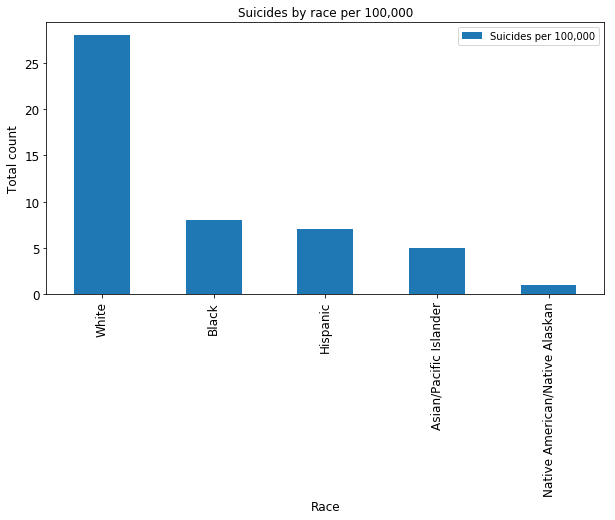

In [36]:
plot_deaths_intent_race_100K("Suicide", suicides_per_race_per_100K)

### Answer
The White race victims suffer the most number suicides (by gun) per 100,000.

### 11) Which race suffered the most number of homicides per 100,000 population of that race group?

In [37]:
homicides_per_race = deaths_per_intent_per_race("Homicide")
homicides_per_race_per_100K = deaths_per_race_per_intent_per_100k("Homicide", homicides_per_race)
homicides_per_race_per_100K

,Total suicides,Total race population,"Homicides per 100,000"
Race,,,
Black,19510,40250635,48.0
White,9147,197318956,5.0
Hispanic,5634,44618105,13.0
Asian/Pacific Islander,559,15834141,4.0
Native American/Native Alaskan,326,40250635,1.0


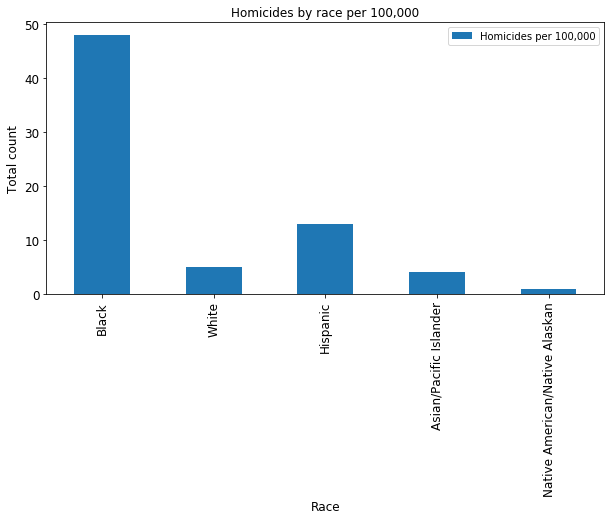

In [38]:
plot_deaths_intent_race_100K("Homicide", homicides_per_race_per_100K)

### Answer

The Black race victims suffer the most number homicides (by gun) per 100,000.

### 12) Is there any corelation between number of deaths and months?

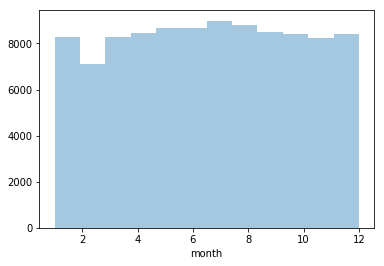

In [40]:
sns.distplot(deaths_df["month"].astype(int), label="Distribution of the age", bins=12,hist=True, kde=False, rug=False)

No particular correlation found. Although February month recorded the least number of deaths.

### 13) Is there any correlation between homicides and months?

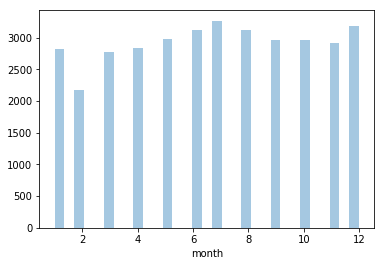

In [41]:
sns.distplot(deaths_df.loc[deaths_df["intent"] == "Homicide", "month"].astype(int), hist=True, kde=False, rug=False)

July and December month recorded the highest number of homicides.

### 14) Is there any correlation between suicides and months?

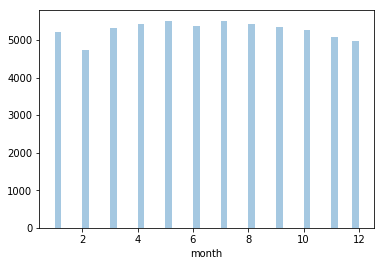

In [64]:
sns.distplot(deaths_df.loc[deaths_df["intent"] == "Suicide", "month"].astype(int),hist=True, kde=False, rug=False)

No particular correlation found.

### 15) Which age group had the most number of men who committed suicides?

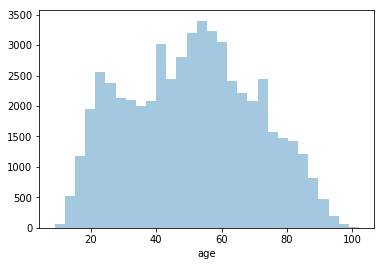

In [74]:
sns.distplot(deaths_df.loc[(deaths_df["sex"] == "M") 
                        & (deaths_df["intent"] == "Suicide")
                        ,"age"].astype(int), 
             label="Distribution of the age",bins=30,hist=True, kde=False, rug=False)

Highest number of male suicides belong to the age group 50 to 60.

### 16) Which age group had the most number of women who committed suicides?

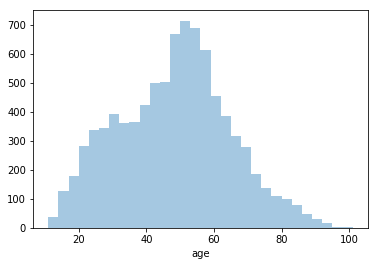

In [73]:
sns.distplot(deaths_df.loc[(deaths_df["sex"] == "F") 
                        & (deaths_df["intent"] == "Suicide")
                        ,"age"].astype(int), 
             label="Distribution of the age",bins=30,hist=True, kde=False, rug=False)

Highest number of women suicides belong to the age group 40 to 60. Out of that, women aged between 50 and 60 committed the most number of suicides.

# Summary of findings of the data exploration


While this data is of just 3 years (2012-2014) it certainly highlights some key statistics about the gun deaths in the US.

About the victims
1. The leading intent of gun deaths are suicides. (63% of total gun deaths)
2. More than 60% of the victims had education level of High School Diploma or below that.
3. Almost 25% of the victims were of the age group 21-32 years.
4. 60% of the gun deaths happend at victims' home.

On Gun deaths and Race
1. Victims from Black/African-American race sufferd the most number of deaths i.e. 58 per 100,000 people of that race (Followed by white - 34)
2. Victims from White race sufferd the most number of suicides i.e. 28 per 100,000 people of that race. (Followed by Black - 8)
2. Black/African-American victims suffered the highest number of homicides i.e. 48 per 100,000 people people of that race. (Followed by Hispanic - 13)

More on Suicidal Gun deaths
1. The highest number of suicides were from the age group 40 to 60.
2. Out of the total women suicide victims, women of the age between 50 and 60 committed the most number of suicides.

Few more:
1. February recorded the least number of gun deaths across three years.
2. July and December month recorded the highest number of homicides.